# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [104]:
# Code Here
#!pip install palmerpenguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from palmerpenguins import load_penguins

# Load the dataset
penguin = load_penguins()

# Print the first few rows of the dataset
penguin.head()

penguin = penguin.dropna()

from plotnine import *

In [63]:
#Which variables would we need to dummify?

#pd.get_dummies(penguin['species'])

#enc = OneHotEncoder()
#enc.fit(penguin[['species']]) #learns categories of species variable
#enc.transform(penguin[['species']]).toarray()


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [87]:
import sklearn
import pandas as pd
import numpy as np

y = penguin['bill_depth_mm']
X = penguin[['bill_length_mm']]

#use linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr_fit = lr.fit(X_train, y_train)

lr_fit.coef_

#linear regression- test the data
train_pred_lr = lr_fit.predict(X_train)
test_pred_lr = lr_fit.predict(X_test)

preds = lr_fit.predict(X)


from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_train, train_pred_lr))
print(mean_squared_error(y_test, test_pred_lr))

print(r2_score(y_train, train_pred_lr))
print(r2_score(y_test, test_pred_lr))

3.802687195255261
3.292410632700052
0.0652533881957792
-0.01888808247205742


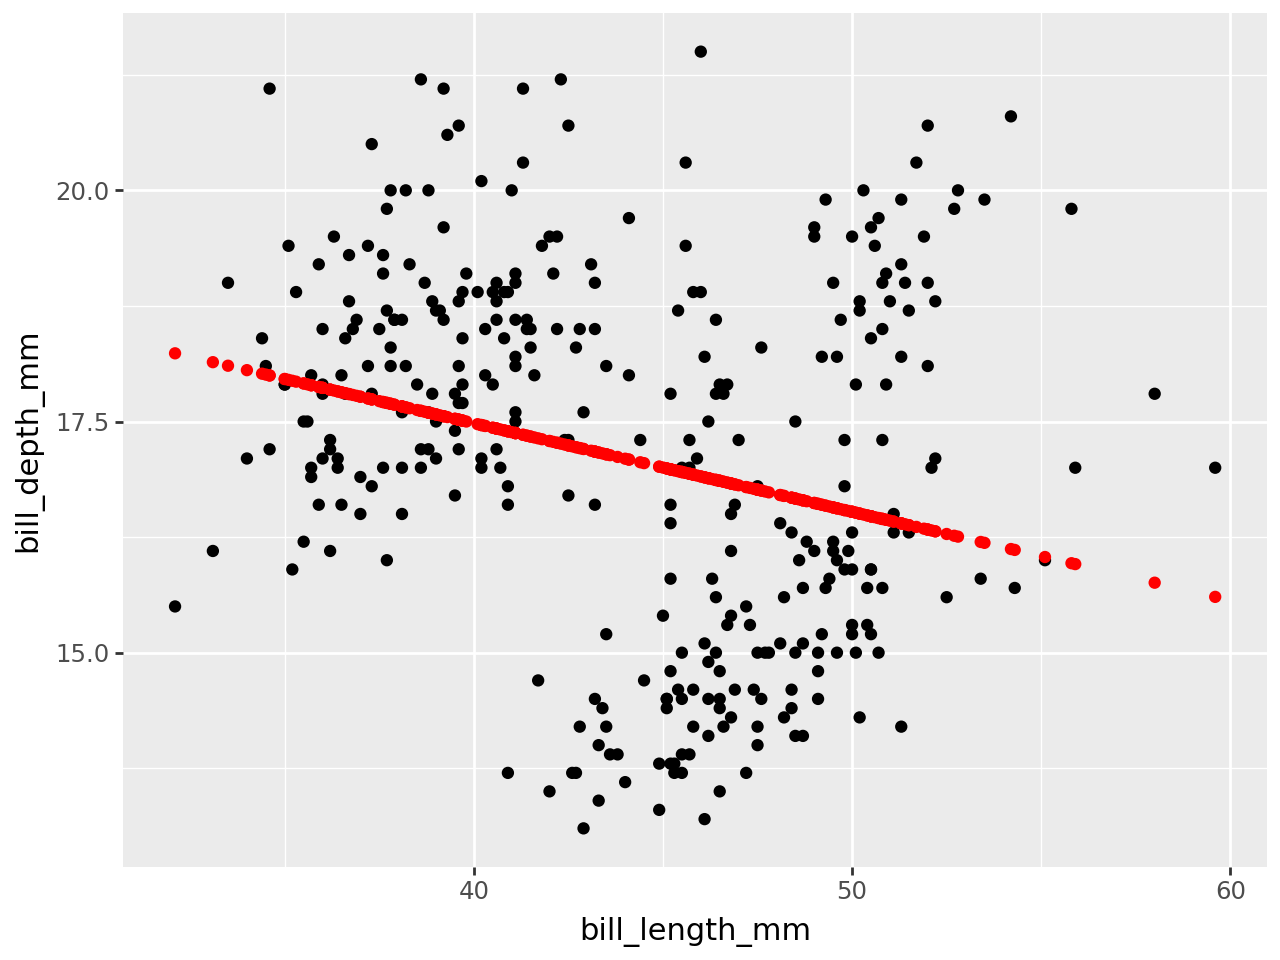

In [88]:
ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm")) + geom_point() + geom_point(aes(y=preds), color = "red")

Quadratic


In [126]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
penguin = load_penguins()
penguin = penguin.dropna()

# Select the feature and target
y = penguin['bill_depth_mm']
X = penguin[['bill_length_mm']]

# Remove rows with missing values
#X = X.dropna()
#y = y[X.index]  # Ensure consistent indices after dropping

# Manually create quadratic feature
X['bill_length_mm_squared'] = X['bill_length_mm'] ** 2  # Use .loc to avoid SettingWithCopyWarning

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and fit the linear regression model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

# Predict the training and test data
train_pred_lr = lr_fit.predict(X_train)
test_pred_lr = lr_fit.predict(X_test)

preds = lr_fit.predict(X)

# Calculate Mean Squared Error and R² Score for both training and test sets
train_mse = mean_squared_error(y_train, train_pred_lr)
test_mse = mean_squared_error(y_test, test_pred_lr)

train_r2 = r2_score(y_train, train_pred_lr)
test_r2 = r2_score(y_test, test_pred_lr)

# Print the results
print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Training Mean Squared Error: 3.6256236895726195
Test Mean Squared Error: 2.9124616785138278
Training R² Score: 0.10022156451699782
Test R² Score: 0.13038293413005753


<ipython-input-126-ff8705a46ab2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


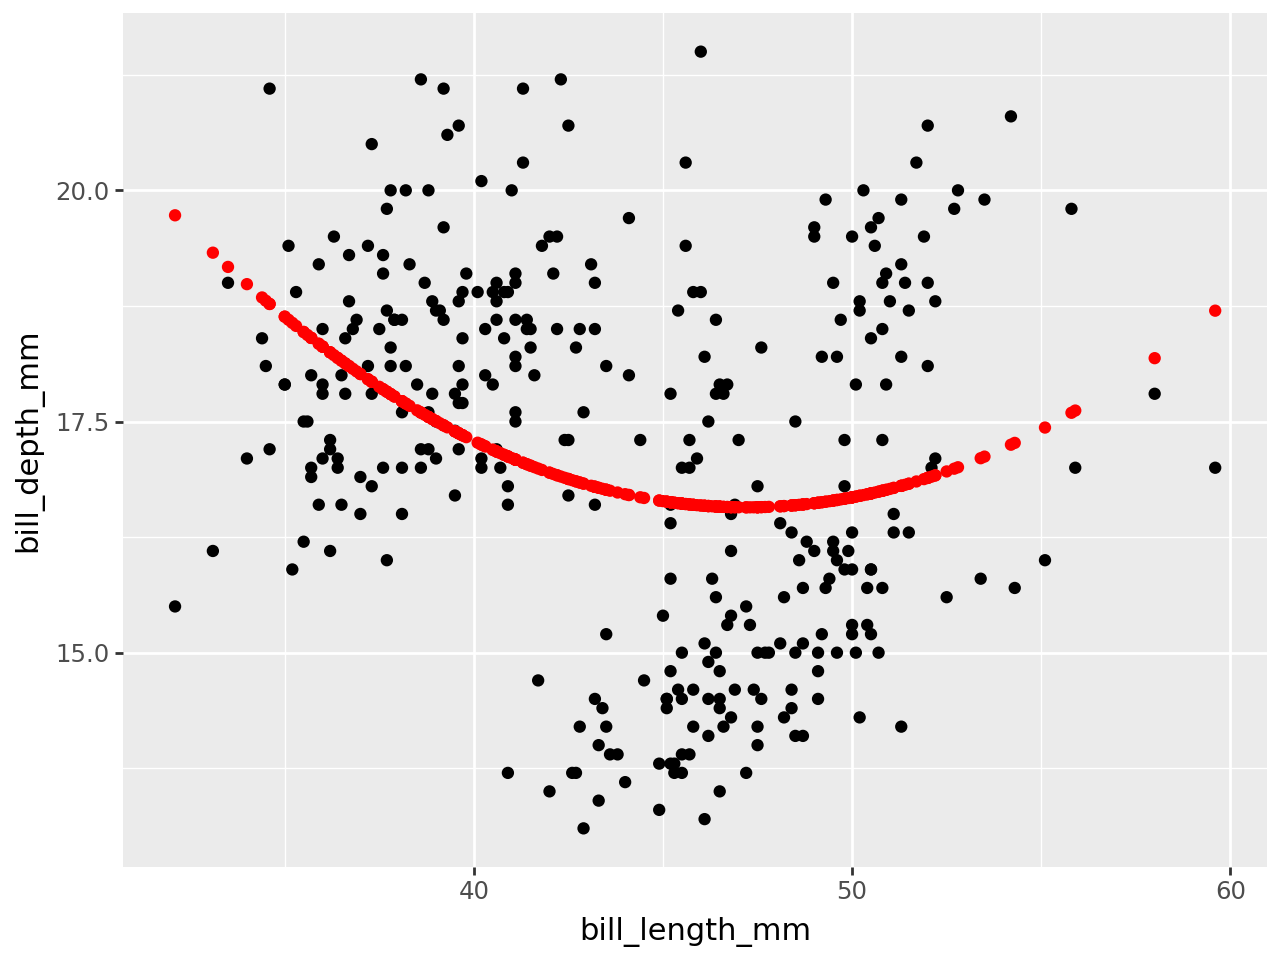

In [127]:
ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm")) + geom_point() + geom_point(aes(y=preds), color = "red")

Cubic

In [96]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
penguin = load_penguins()

# Select the feature and target, dropping rows with missing values
penguin = penguin.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
y = penguin['bill_depth_mm']
X = penguin[['bill_length_mm']]

# Create polynomial features: x, x^2, and x^3 using .assign()
X = X.assign(
    bill_length_mm_squared=X['bill_length_mm'] ** 2,
    bill_length_mm_cubed=X['bill_length_mm'] ** 3
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and fit the linear regression model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

# Predict the training and test data
train_pred_lr = lr_fit.predict(X_train)
test_pred_lr = lr_fit.predict(X_test)

preds = lr_fit.predict(X)

# Calculate MSE and R² scores
train_mse = mean_squared_error(y_train, train_pred_lr)
test_mse = mean_squared_error(y_test, test_pred_lr)
train_r2 = r2_score(y_train, train_pred_lr)
test_r2 = r2_score(y_test, test_pred_lr)

# Display results
print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Training R² Score:", train_r2)
print("Test R² Score:", test_r2)


Training Mean Squared Error: 3.2316309935650134
Test Mean Squared Error: 3.668489868333733
Training R² Score: 0.1631450591889566
Test R² Score: 0.05853024153928332


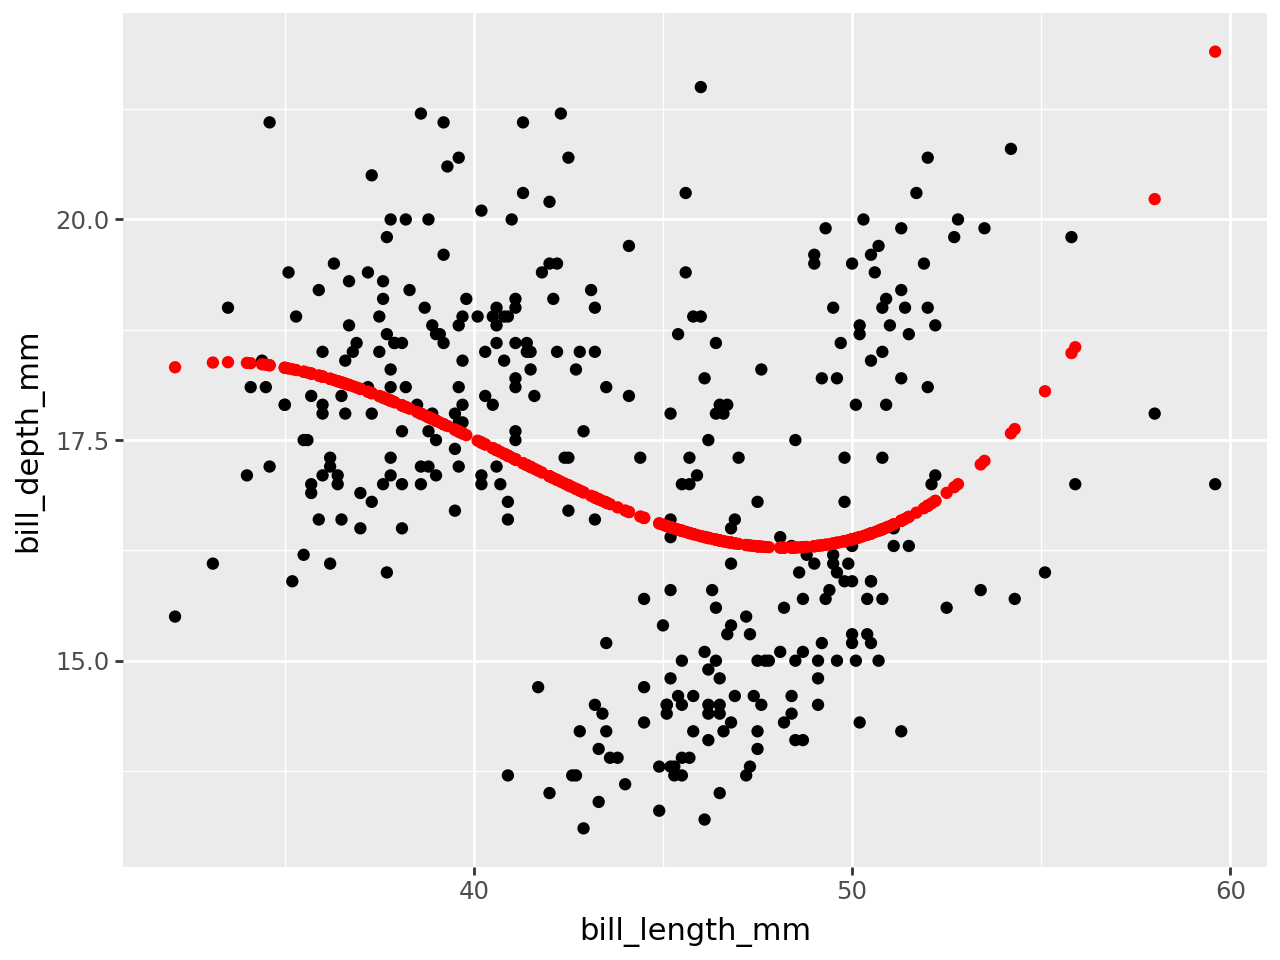

In [98]:
 ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm")) + geom_point() + geom_point(aes(y=preds), color = "red")

Degree

In [128]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
penguin = load_penguins()
penguin = penguin.dropna()

# Select the feature and target
y = penguin['bill_depth_mm']
X = penguin[['bill_length_mm']]

# Manually create polynomial features up to degree 10
for degree in range(2, 11):
    X[f'bill_length_mm_{degree}'] = X['bill_length_mm'] ** degree

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and fit the linear regression model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

# Predict the training and test data
train_pred_lr = lr_fit.predict(X_train)
test_pred_lr = lr_fit.predict(X_test)

tenpreds = lr_fit.predict(X)

# Calculate Mean Squared Error and R² Score for both training and test sets
train_mse = mean_squared_error(y_train, train_pred_lr)
test_mse = mean_squared_error(y_test, test_pred_lr)

train_r2 = r2_score(y_train, train_pred_lr)
test_r2 = r2_score(y_test, test_pred_lr)

# Print the results
print(f"Training Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Training R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")


Training Mean Squared Error: 2.6119953536661096
Test Mean Squared Error: 4.877087997847316
Training R² Score: 0.298608654319073
Test R² Score: -0.1918758314608291


<ipython-input-128-4c71fcc589a6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-128-4c71fcc589a6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-128-4c71fcc589a6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-128-4c71fc

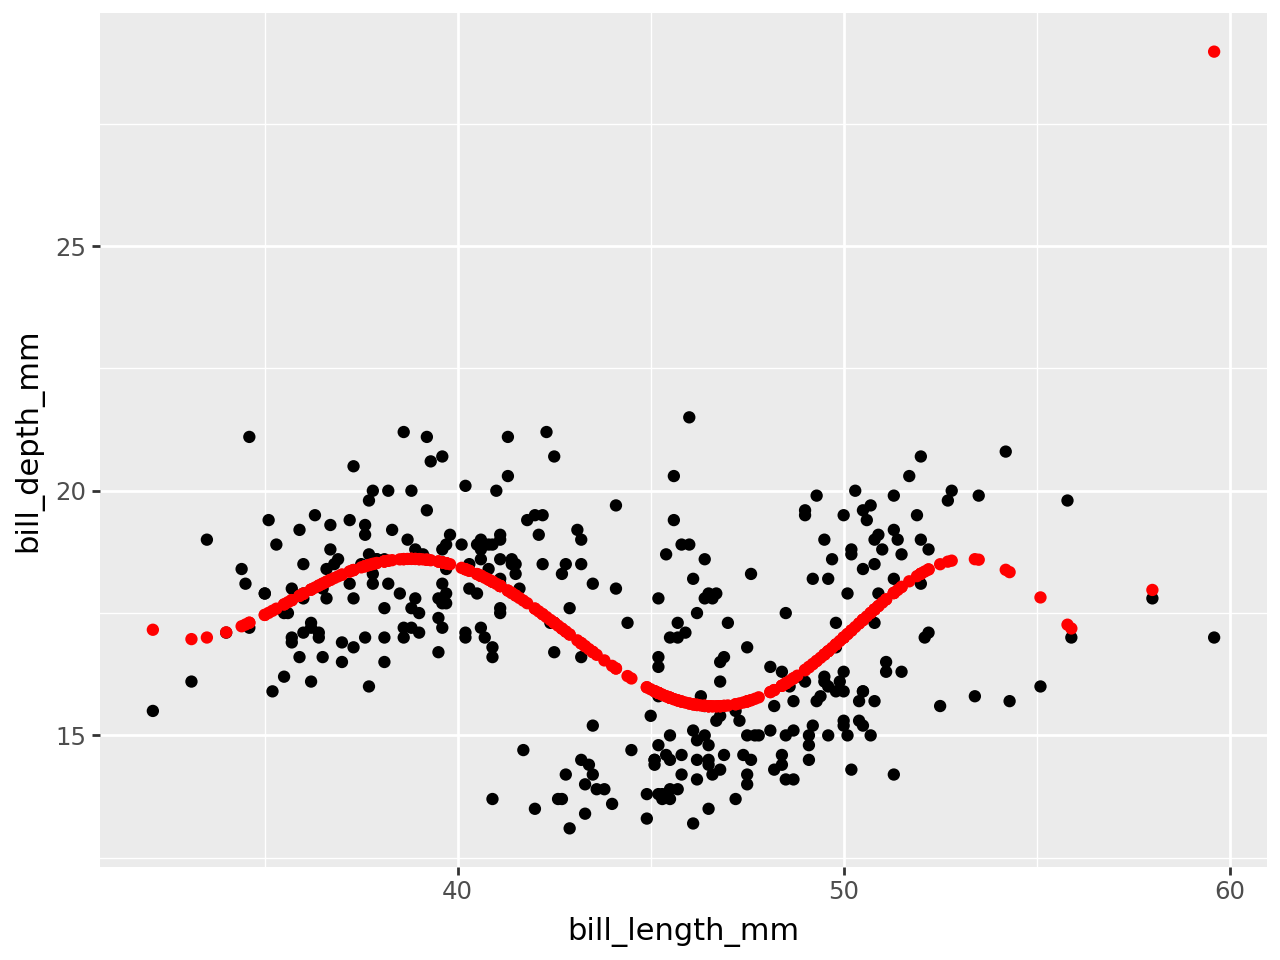

In [129]:
ggplot(penguin, aes(x = "bill_length_mm", y = "bill_depth_mm")) + geom_point() + geom_point(aes(y=tenpreds), color = "red")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The first degree graph is underfitting, we have low R^2 for both test and training. Cubic, and 10th degree are overfitting because the training data has a higher R^2 than the test R^2. However, looking at the graphs, I think the 10th degree model fits the best.